# Importo librerias

In [150]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Defino la funcion "Derivadas Parciales"

In [151]:
def derivada_parcial(variable, funcion, valores=None):
    derivada = sp.diff(funcion, variable)

    if valores != None and type(valores) == dict:
        return derivada.subs(valores)
    
    elif valores != None and type(valores) == list:
        derivadas_evaluadas = []

        for i in valores:
            evaluar = sp.lambdify(variable, derivada)
            derivadas_evaluadas.append(evaluar(i))
        derivadas_evaluadas = np.array(derivadas_evaluadas)
        
        return derivadas_evaluadas

    elif valores != None and (type(valores) == int or type(valores) == float): return derivada.evalf(subs={variable: valores})

    else: return derivada

# Ejemplos

### Ejemplo 1

In [152]:
x, y = sp.symbols('x y')
f = x**2 + x*y**2
df_x = sp.diff(f, x)
df_y = sp.diff(f, y)
valor = {
    x:4,
    y:6
}
print(df_x.subs(valor))

44


### Ejemplo 2

In [153]:
x, y, z = sp.symbols('x y z')
f = x**2 + y**3
derivada = derivada_parcial(x,f,3)
print(f'\nLa derivadadas parciales evaluadas con respecto a x es: {derivada}')


La derivadadas parciales evaluadas con respecto a x es: 6.00000000000000


### Ejemplo 3

In [154]:
x, y, z, h = sp.symbols('x y z h')
f = x**2 + y**2 + z**2 + h**2
valores = {
    x: 2,
    y: 4,
    z: 3,
    h: 8
}
print(f'La derivada con respecto a x evaluada en (x,y)=(2,4) es: {derivada_parcial(x,f, valores)}')

La derivada con respecto a x evaluada en (x,y)=(2,4) es: 4


### Ejemplo 4

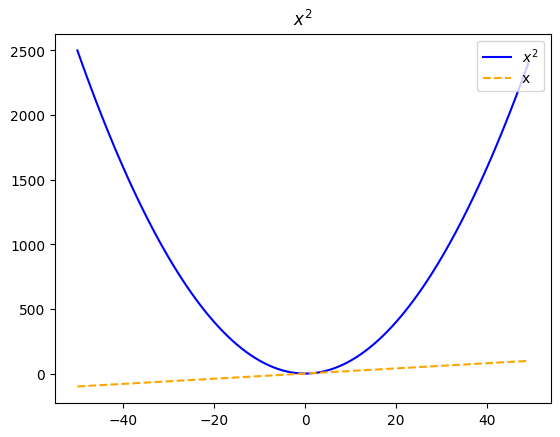

In [164]:
x = sp.symbols('x')
x_valores = np.arange(-50, 50)
funtion = x**2
f = sp.lambdify(x, funtion)

plt.plot(x_valores, f(x_valores), 'b-', label='$x^{2}$')
plt.plot(x_valores, derivada_parcial(x, funtion, list(x_valores)), '--', color='orange', label='x')

plt.title(r'$x^2$')
plt.legend(loc='upper right')
plt.show()